In [12]:
import tensorflow as tf
import tensorflow.keras as tfk
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
dataset=tfk.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
import pandas as pd
df=pd.DataFrame(dataset)

In [7]:
df.head(4)

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [31]:
(X_train,y_train),(X_test,y_test)=dataset

In [57]:
X_train=X_train/255.0
X_test=X_test/255.0

In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [58]:
tf.random.set_seed=42
model=tfk.Sequential()
model.add(tfk.layers.Input(shape=[28,28]))
model.add(tfk.layers.Flatten())
model.add(tfk.layers.Dense(50,activation="relu"))

model.add(tfk.layers.Dense(90,activation="relu"))
model.add(tfk.layers.Dense(10,activation="softmax"))

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 50)                39250     
                                                                 
 dense_24 (Dense)            (None, 90)                4590      
                                                                 
 dense_25 (Dense)            (None, 10)                910       
                                                                 
Total params: 44750 (174.80 KB)
Trainable params: 44750 (174.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.layers[1]

In [60]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


In [66]:
history=model.fit(X_train,y_train, epochs=80,validation_data=(X_test,y_test))

Epoch 1/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9754 - accuracy: 0.6141 - val_loss: 64.7283 - val_accuracy: 0.4054
Epoch 2/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9676 - accuracy: 0.6155 - val_loss: 64.3648 - val_accuracy: 0.4076
Epoch 3/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9657 - accuracy: 0.6187 - val_loss: 64.7794 - val_accuracy: 0.4103
Epoch 4/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9628 - accuracy: 0.6198 - val_loss: 63.9512 - val_accuracy: 0.4153
Epoch 5/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9502 - accuracy: 0.6236 - val_loss: 64.4516 - val_accuracy: 0.4219
Epoch 6/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9476 - accuracy: 0.6262 - val_loss: 64.5690 - val_accuracy: 0.4251
Epoch 7/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9420 - accuracy: 0.6276 - val_loss: 66.2372 - val_ac

1875/1875 [==============================] - 2s 1ms/step - loss: 0.7334 - accuracy: 0.7271 - val_loss: 59.9907 - val_accuracy: 0.6039
Epoch 58/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7286 - accuracy: 0.7289 - val_loss: 59.8704 - val_accuracy: 0.6045
Epoch 59/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7270 - accuracy: 0.7295 - val_loss: 59.6638 - val_accuracy: 0.6065
Epoch 60/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7242 - accuracy: 0.7316 - val_loss: 60.5626 - val_accuracy: 0.6066
Epoch 61/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7183 - accuracy: 0.7325 - val_loss: 59.5844 - val_accuracy: 0.6057
Epoch 62/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7170 - accuracy: 0.7322 - val_loss: 59.8268 - val_accuracy: 0.6089
Epoch 63/80
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7128 - accuracy: 0.7333 - val_loss: 60.1845 - val_accurac

In [46]:
import matplotlib.pyplot as plt


In [67]:
history_df = pd.DataFrame(history.history)


In [68]:
history_df.head

<bound method NDFrame.head of         loss  accuracy   val_loss  val_accuracy
0   0.975377  0.614067  64.728256        0.4054
1   0.967647  0.615550  64.364792        0.4076
2   0.965728  0.618750  64.779434        0.4103
3   0.962803  0.619817  63.951199        0.4153
4   0.950218  0.623567  64.451622        0.4219
..       ...       ...        ...           ...
75  0.676613  0.746533  59.094574        0.6181
76  0.674343  0.747317  58.654068        0.6209
77  0.674918  0.745250  58.398602        0.6202
78  0.668131  0.747683  59.100624        0.6194
79  0.667427  0.751033  59.058964        0.6191

[80 rows x 4 columns]>

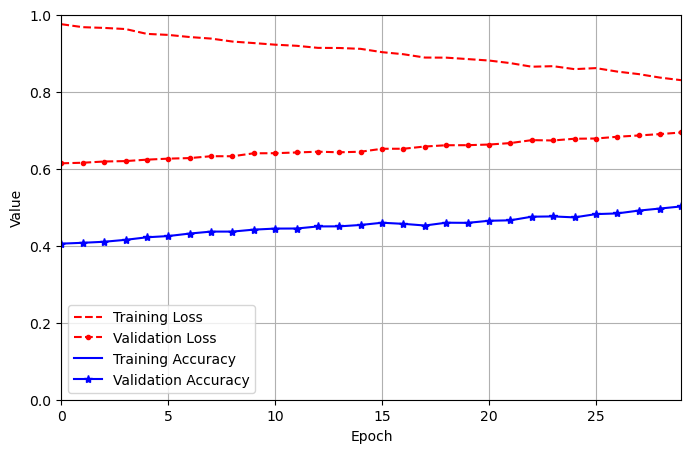

In [69]:
history_df.plot(figsize=(8, 5), grid=True, xlabel="Epoch", xlim=[0, 29], ylim=[0, 1], style=['r--', 'r--.', 'b-', 'b-*'])

# Add labels and legend
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend(["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy"])

plt.show()

In [70]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 856us/step - loss: 59.0590 - accuracy: 0.6191


[59.058963775634766, 0.6190999746322632]

In [71]:
pred=model.predict(X_test[:5])

1/1 [==============================] - 0s 76ms/step


In [72]:
pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.89, 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  ]],
      dtype=float32)